<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/Visualization/plt01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# jupyter notebook should use this code
%matplotlib inline

# 1. Line Plot

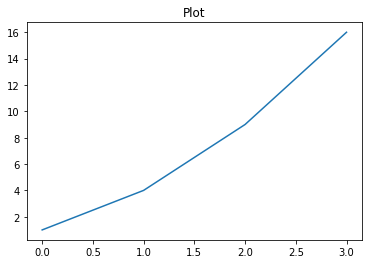

In [2]:
plt.title('Plot')
plt.plot([1, 4, 9, 16])     # only yticks
plt.show()
# default xticks are 0 ~ 3

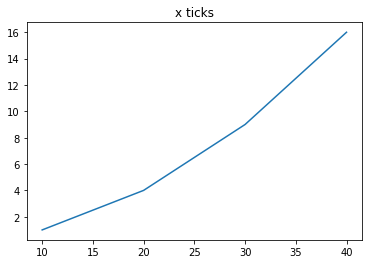

In [3]:
plt.title('x ticks')
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])   # use xticks
plt.show()

# 2. 한글 폰트 사용

- http://hangeul.naver.com/2017/nanum 에서 폰트 인스톨러를 내려받아 실행한다.

In [4]:
!sudo apt install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/

In [5]:
import matplotlib.font_manager as fm

# fm._rebuild()
sorted([f.name for f in fm.fontManager.ttflist if f.name.startswith('Nanum')])

['Nanum Brush Script',
 'Nanum Pen Script',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumBarunpen',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumSquare',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumSquareRound']

## 2.1 rc parameter

In [6]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')

# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus=False)

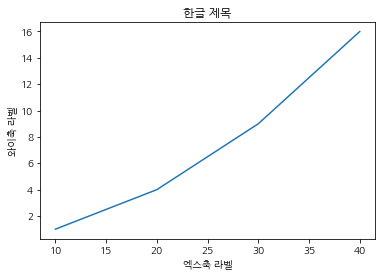

In [7]:
# 경고 문구 삭제
import warnings
warnings.filterwarnings('ignore')

# 확인
plt.title('한글 제목')
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.xlabel("엑스축 라벨")
plt.ylabel("와이축 라벨")
plt.show()

## 2.2 개별 텍스트 관련 명령에만 적용

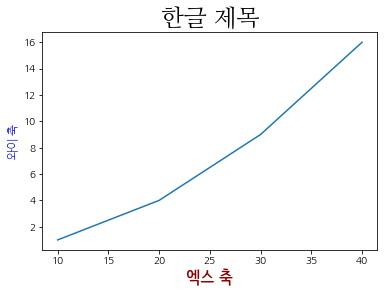

In [8]:
font1 = {'family': 'NanumMyeongjo', 'size': 24, 
         'color':  'black'}
font2 = {'family': 'NanumBarunpen', 'size': 18, 'weight': 'bold',
         'color':  'darkred'}
font3 = {'family': 'NanumBarunGothic', 'size': 12, 'weight': 'light',
         'color':  'blue'}

plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.title('한글 제목', fontdict=font1)
plt.xlabel('엑스 축', fontdict=font2)
plt.ylabel('와이 축', fontdict=font3)
plt.show()

# 3. Style

- https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

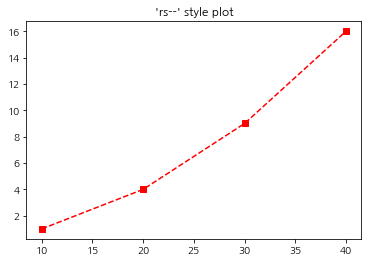

In [9]:
plt.title("'rs--' style plot")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'rs--')
plt.show()

## 3.1 Color

- http://matplotlib.org/examples/color/named_colors.html


    b : blue
    g : green
    r : red
    c : cyan
    m : magenta
    y : yellow
    k : black
    w : white

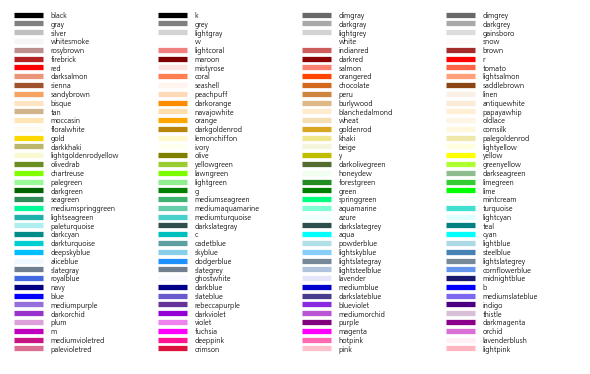

In [10]:
"""
========================
Visualizing named colors
========================

Simple plot example with the named colors and its visual representation.
"""
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

## 3.2 Marker

    . : point marker
    , : pixel marker
    o : circle marker
    v : triangle_down marker
    ^ : triangle_up marker
    < : triangle_left marker
    > : triangle_right marker
    1 : tri_down marker
    2 : tri_up marker
    3 : tri_left marker
    4 : tri_right marker
    s : square marker
    p : pentagon marker
    * : star marker
    h : hexagon1 marker
    H : hexagon2 marker
    + : plus marker
    x : x marker
    D : diamond marker
    d : thin_diamond marker

## 3.3 Line Style

    -  : solid line style
    -- : dashed line style
    -. : dash-dot line style
    :  : dotted line style

## 3.4 ETC

    c : color
    lw : linewidth
    ls : linestyle
    marker
    ms : markersize
    mec : markerdedgecolor (선 색깔)
    mew : markeredgewidth
    mfc : markeredgecolor (내부 색깔)

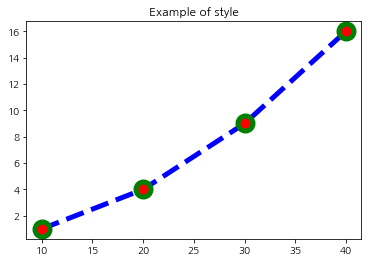

In [11]:
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b", lw=5, ls="--", marker="o", 
         ms=15, mec="g", mew=5, mfc="r")
plt.title("Example of style")
plt.show()

# 4. 그림 범위 지정

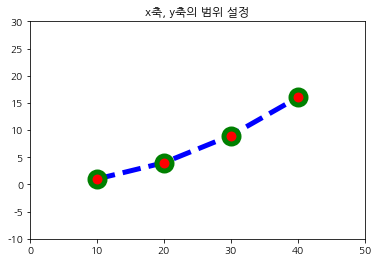

In [12]:
plt.title("x축, y축의 범위 설정")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b", lw=5, ls="--", marker="o", 
         ms=15, mec="g", mew=5, mfc="r")

# x축 범위 지정
plt.xlim(0, 50)

# y축 범위 지정
plt.ylim(-10, 30)

plt.show()

# 5. Tick 설정

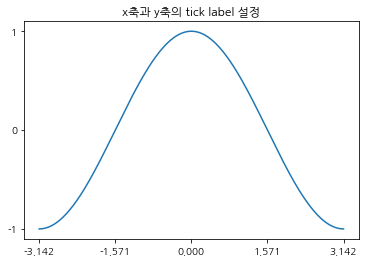

In [13]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("x축과 y축의 tick label 설정")
plt.plot(X, C)

# xtick 설정
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])

# ytick 설정
plt.yticks([-1, 0, +1])

plt.show()

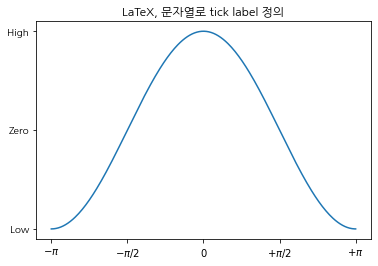

In [14]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("LaTeX, 문자열로 tick label 정의")
plt.plot(X, C)

# $$ 사이에 수학 LaTex문자식 가능
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])
plt.show()

# 6. Grid 설정

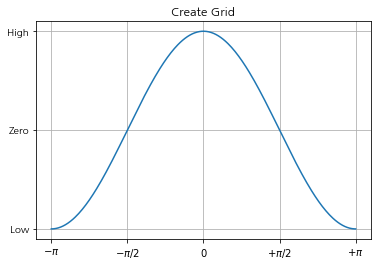

In [15]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("Create Grid")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, 1], ["Low", "Zero", "High"])

# grid 생성
plt.grid(True)
plt.show()

# 7. 여러 개의 선 그리기

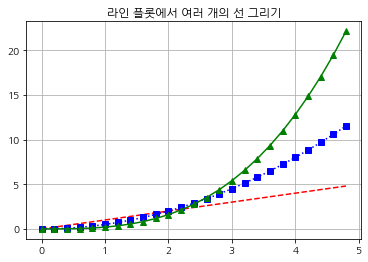

In [16]:
t = np.arange(0., 5., 0.2)
plt.title("라인 플롯에서 여러 개의 선 그리기")
plt.plot(t, t, 'r--', t, 0.5 * t**2, 'bs:', t, 0.2 * t**3, 'g^-')
plt.grid(True)
plt.show()

## 7.1 겹쳐 그리기

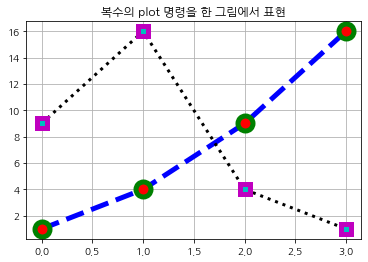

In [17]:
plt.title("복수의 plot 명령을 한 그림에서 표현")
plt.plot([1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
# plt.hold(True)   # <-- 1,5 버전에서는 이 코드가 필요하다.
plt.plot([9, 16, 4, 1],
         c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=5, mfc="c")
# plt.hold(False)  # <-- 1,5 버전에서는 이 코드가 필요하다.
plt.grid(True)
plt.show()

## 7.2 범례(legend)

    0  : best
    1  : upper right
    2  : upper left
    3  : lower left
    4  : lower right
    5  : right
    6  : center left
    7  : center right
    8  : lower center
    9  : upper center
    10 : center

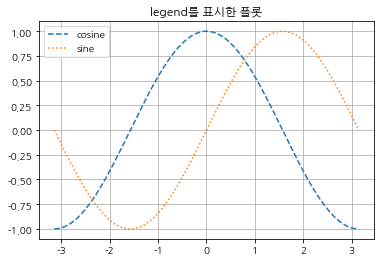

In [18]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.title("legend를 표시한 플롯")
plt.plot(X, C, ls="--", label="cosine")
plt.plot(X, S, ls=":", label="sine")

# 2 : upper left
plt.legend(loc=2)
plt.grid(True)
plt.show()

# 8. x축, y축 라벨, 타이틀

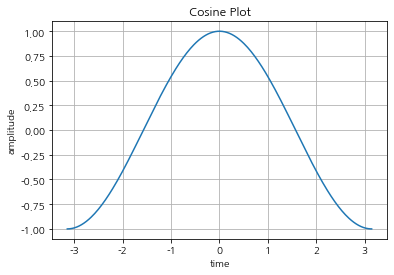

In [19]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label="cosine")

# x축 라벨
plt.xlabel("time")

# y축 라벨
plt.ylabel("amplitude")

# 타이틀
plt.title("Cosine Plot")
plt.grid(True)
plt.show()

## 8.1 Example 1

*   xlabel, ylabel, title을 모두 갖추고 있어야 한다.
*   하나의 Figure에 3개 이상의 Plot을 그린다.
*   각 Plot은 다른 선, 마크, 색 스타일을 가진다.
*   legend는 그래프와 겹치지 않는 곳에 위치 시키도록 한다.

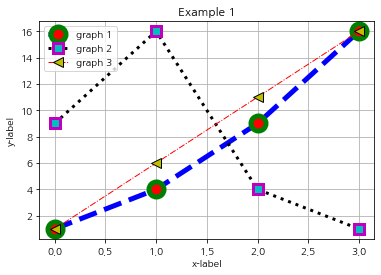

In [20]:
plt.title("Example 1")
plt.xlabel('x-label')
plt.ylabel('y-label')

plt.plot([1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r", 
         label='graph 1')
plt.plot([9, 16, 4, 1],
         c="k", lw=3, ls=":", marker="s", ms=10, mec="m", mew=3, mfc="c", 
         label='graph 2')
plt.plot([1, 6, 11, 16],
         c="r", lw=1, ls="-.", marker="<", ms=10, mec="k", mew=1, mfc="y", 
         label='graph 3')

plt.legend(loc=2)
plt.grid(True)
plt.show()

# 9. 그림의 구조

## 9.1 Figure 객체

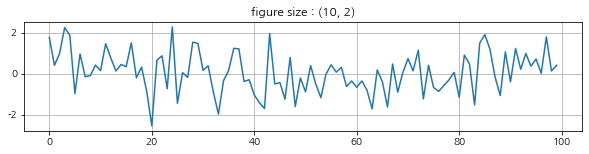

In [21]:
# figure
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.grid(True)
plt.show()

Figure(432x288) 139789049089488
Figure(432x288) 139789049089488


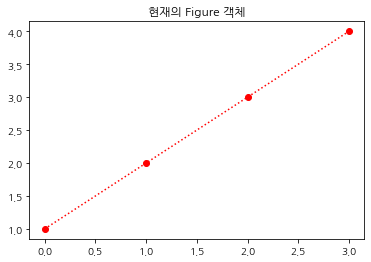

In [22]:
# gcf
f1 = plt.figure(1)
plt.title("현재의 Figure 객체")
plt.plot([1, 2, 3, 4], 'ro:')

f2 = plt.gcf()
print(f1, id(f1))
print(f2, id(f2))
plt.show()

## 9.2 Axes 객체와 subplot 명령

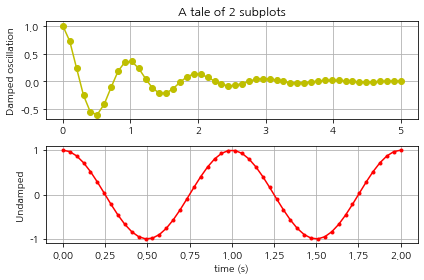

In [23]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# 윗부분 plot (2, 1, 1)
ax1 = plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
plt.grid(True)

# 아랫부분 plot (2, 1, 2)
ax2 = plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
plt.grid(True)
plt.show()

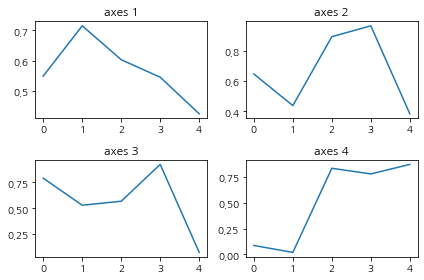

In [24]:
np.random.seed(0)

plt.subplot(221)
plt.plot(np.random.rand(5))
plt.title("axes 1")

plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title("axes 2")

plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title("axes 3")

plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title("axes 4")

plt.tight_layout()
plt.show()

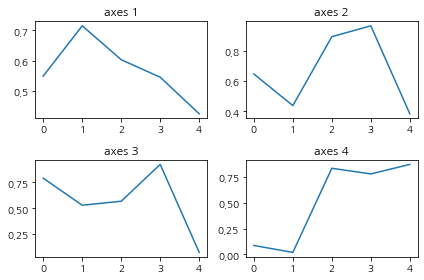

In [25]:
# 2x2 plot 생성
fig, axes = plt.subplots(2, 2)
np.random.seed(0)

axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title("axes 1")

axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")

axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")

axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")

plt.tight_layout()
plt.show()

### 9.2.1 Example 2

- 여러가지 함수를 사용하여 위와 같이 subplot들로 구성된 그림을 그려보자.
- 모든 subplot에 대해 xlabel, ylabel, title이 있어야 한다.

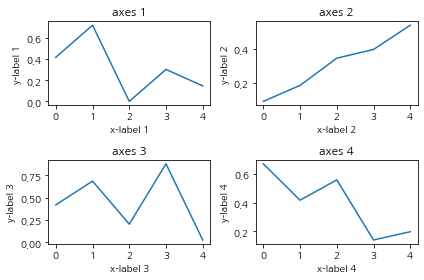

In [26]:
fig, axes = plt.subplots(2, 2)
np.random.seed(1)

axes[0, 0].plot(np.random.rand(5))
axes[0, 0].set_title("axes 1")
axes[0, 0].set_xlabel('x-label 1')
axes[0, 0].set_ylabel('y-label 1')

axes[0, 1].plot(np.random.rand(5))
axes[0, 1].set_title("axes 2")
axes[0, 1].set_ylabel('y-label 2')
axes[0, 1].set_xlabel('x-label 2')

axes[1, 0].plot(np.random.rand(5))
axes[1, 0].set_title("axes 3")
axes[1, 0].set_xlabel('x-label 3')
axes[1, 0].set_ylabel('y-label 3')

axes[1, 1].plot(np.random.rand(5))
axes[1, 1].set_title("axes 4")
axes[1, 1].set_xlabel('x-label 4')
axes[1, 1].set_ylabel('y-label 4')

plt.tight_layout()
plt.show()

## 9.3 Axis 객체와 축

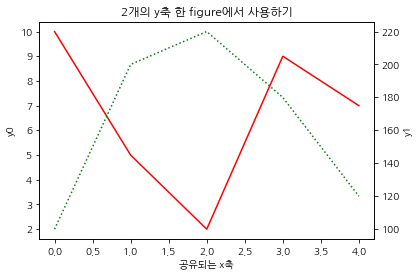

In [27]:
fig, ax0 = plt.subplots()

# twinx : 복수의 y축 만들기
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax0.grid(False)
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax1.grid(False)
ax0.set_xlabel("공유되는 x축")
plt.show()

### 9.3.1 Example 3

1. 맷플롯리브 갤러리 웹사이트에서 관심있는 예제 코드를 하나 고른다.
    - http://matplotlib.org/gallery.html

2. 예제 코드에 사용된 맷플롯리브 API 명령의 목록을 만들고 맷플롯리브 웹사이트에서 관련 링크를 찾아 내용을 정리한다.

3. 변형된 형태의 플롯을 만들어본다.

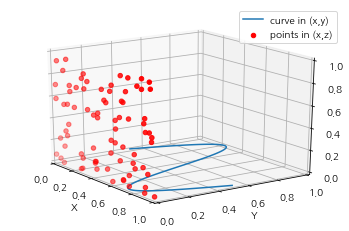

In [28]:
"""
=======================
Plot 2D data on 3D plot
=======================

Demonstrates using ax.plot's zdir keyword to plot 2D data on
selective axes of a 3D plot.
"""

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')
x = np.random.sample(20*len(colors))
y = np.random.sample(20*len(colors))
c_list = []
for c in colors:
    c_list.append([c]*20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c='r', label='points in (x,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

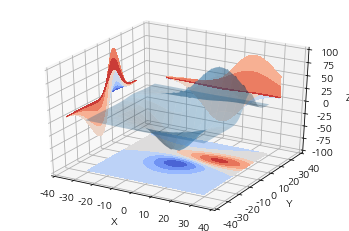

In [29]:
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()